[View in Colaboratory](https://colab.research.google.com/github/ArjunGajmer/Assignment-ML/blob/master/Assignment14(BalanceScaleTipClassifier).ipynb)

#Balance Scale Tip Classifier

The motto of the project is to classify the balance scale tip.The dataset is taken from [Balance Datasheet](http://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data).
We will use the concept of  **Decision Tree** and **Random froest Tree** classifier under the *Sckit-Learning* for the classification .

## Data Description
This data set was generated to model psychological
	experimental results.  Each example is classified as having the
	balance scale tip to the right, tip to the left, or be
	balanced.  The attributes are the ***left weight***, the ***left
	distance*** , the ***right weight***, and the ***right distance***.  The
	correct way to find the class is the greater of 
	(**left-distance * left-weight)** and **(right-distance *
	right-weight)**.  If they are equal, it is balanced.
  
 **Number of Instances:** 625 (49 balanced, 288 left, 288 right)
 **Number of Attributes:** 4 (numeric) + class name = 5
 
 ## Attribute Information:
	1.Class Name: 3 (L, B, R)
	2.Left-Weight: 5 (1, 2, 3, 4, 5)
	3.Left-Distance: 5 (1, 2, 3, 4, 5)
	4.Right-Weight: 5 (1, 2, 3, 4, 5)
	5.Right-Distance: 5 (1, 2, 3, 4, 5)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataSet

In [0]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',names=['Class','Left_weight','Left_distance','right_weight','right_distance'])


In [109]:
print('First five rows\n')
df.head()

First five rows



,Class,Left_weight,Left_distance,right_weight,right_distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [110]:
print('Shape of data')
df.shape

Shape of data


(625, 5)

In [111]:
print('Size of data')
df.size

Size of data


3125

In [112]:
print('Null check')
df.isnull().sum()

Null check


Class             0
Left_weight       0
Left_distance     0
right_weight      0
right_distance    0
dtype: int64

We don't have any missing values here .

In [113]:
print("Statistical Description of data")
df.describe()

Statistical Description of data


,Left_weight,Left_distance,right_weight,right_distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [114]:
print('Grouping the data on the basis of class')
dfg=df.groupby(by='Class').agg(['mean'])
dfg['Count']=df.groupby(by='Class')['Left_weight'].agg(['count'])
dfg.head()

Grouping the data on the basis of class


,Left_weight,Left_distance,right_weight,right_distance,Count
,mean,mean,mean,mean,
Class,,,,,
B,2.938776,2.938776,2.938776,2.938776,49
L,3.611111,3.611111,2.399306,2.399306,288
R,2.399306,2.399306,3.611111,3.611111,288


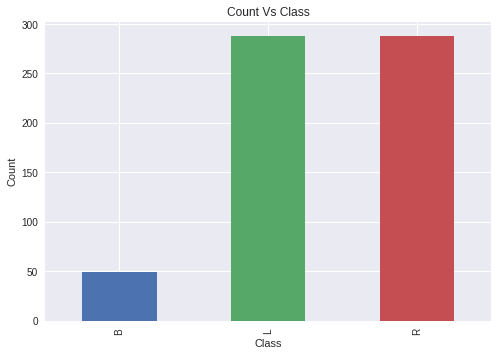

In [115]:
dfg['Count'].plot(kind='bar')
plt.ylabel('Count')
plt.title('Count Vs Class')
sns.despine()

We can see that the balanced tips are much lesser than the left and right tips.

### Data Preprocessing

Preparing Attributes

In [0]:

X=df.drop(['Class'],axis=1)

Preparing labels

In [0]:
Y=df.Class

### Splitting dataset into training and testing set

In [0]:
from sklearn.cross_validation import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2)

### Building and training dataset using  Decision Tree model

### gini index criterion

In [0]:
from sklearn.tree import * 

In [0]:
gini_criterion=DecisionTreeClassifier(criterion='gini')

**Training**

In [122]:
gini_criterion.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Prediction**

In [0]:
gini_criterion_predict=gini_criterion.predict(x_test)

**Score**

In [149]:
gd=gini_criterion.score(x_test,y_test)
gd

0.816

In [0]:
import sklearn.metrics as met

**Confusion Matrix**

In [126]:
print(met.confusion_matrix(y_test,gini_criterion_predict))

[[ 0  3  2]
 [ 8 44  2]
 [ 4  4 58]]


**Classification Report**

In [127]:
print(met.classification_report(y_test,gini_criterion_predict))

             precision    recall  f1-score   support

          B       0.00      0.00      0.00         5
          L       0.86      0.81      0.84        54
          R       0.94      0.88      0.91        66

avg / total       0.87      0.82      0.84       125



### **entropy criterion**

In [0]:
entropy_criterion=DecisionTreeClassifier(criterion='entropy')

**Training**

In [129]:
  entropy_criterion.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Prediction**

In [0]:
entropy_criterion_predict=entropy_criterion.predict(x_test)

**Score**

In [150]:
  ed=entropy_criterion.score(x_test,y_test)
  ed

0.824

**Classification Report**

In [132]:
print(met.classification_report(y_test,entropy_criterion_predict))

             precision    recall  f1-score   support

          B       0.00      0.00      0.00         5
          L       0.88      0.81      0.85        54
          R       0.94      0.89      0.91        66

avg / total       0.87      0.82      0.85       125



**Confusion Matrix**

In [133]:
print(met.confusion_matrix(y_test,entropy_criterion_predict))

[[ 0  3  2]
 [ 8 44  2]
 [ 4  3 59]]


## Building and training dataset using Random Forest model

In [0]:
from sklearn.ensemble import RandomForestClassifier

### gini criterion

In [0]:
gini_forest=RandomForestClassifier(criterion='gini')

**Training**

In [136]:
gini_forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Prediction**

In [0]:
gini_forest_predict=gini_forest.predict(x_test)

**Score**

In [151]:
gf=gini_forest.score(x_test,y_test)
gf

0.816

**Classficiation report**

In [139]:
print(met.classification_report(y_test,gini_forest_predict))

             precision    recall  f1-score   support

          B       0.00      0.00      0.00         5
          L       0.87      0.85      0.86        54
          R       0.93      0.85      0.89        66

avg / total       0.87      0.82      0.84       125



**Confusion Matrix**

In [140]:
print(met.confusion_matrix(y_test,gini_forest_predict))

[[ 0  4  1]
 [ 5 46  3]
 [ 7  3 56]]


### entropy criterion

In [0]:
entropy_forest=RandomForestClassifier(criterion='entropy')

**Training**

In [142]:
entropy_forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Prediction**

In [0]:
entropy_forest_predict=entropy_forest.predict(x_test)

**Score**

In [152]:
ef=entropy_forest.score(x_test,y_test)
ef

0.848

**Classification Report**

In [145]:
print(met.classification_report(y_test,entropy_forest_predict))

             precision    recall  f1-score   support

          B       0.00      0.00      0.00         5
          L       0.90      0.85      0.88        54
          R       0.94      0.91      0.92        66

avg / total       0.88      0.85      0.87       125



**Confusion Matrix**

In [147]:

pd.crosstab(y_test,entropy_forest_predict,rownames=['Actual'],colnames=['Predicted'])

Predicted,B,L,R
Actual,,,
B,0,3,2
L,6,46,2
R,4,2,60


## Comapring  all the scores

In [0]:
compare=pd.DataFrame({'Model':['Decision_Tree_Gini_Crietrion','Decision_Tree_Entropy_Crietrion','Random_Forest_Gini_Criterion','Random_Forest_Entropy_Crieterion'],
                      'Score':[gd,ed,gf,ef]})

In [167]:
compare

,Model,Score
0,Decision_Tree_Gini_Crietrion,0.816
1,Decision_Tree_Entropy_Crietrion,0.824
2,Random_Forest_Gini_Criterion,0.816
3,Random_Forest_Entropy_Crieterion,0.848


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


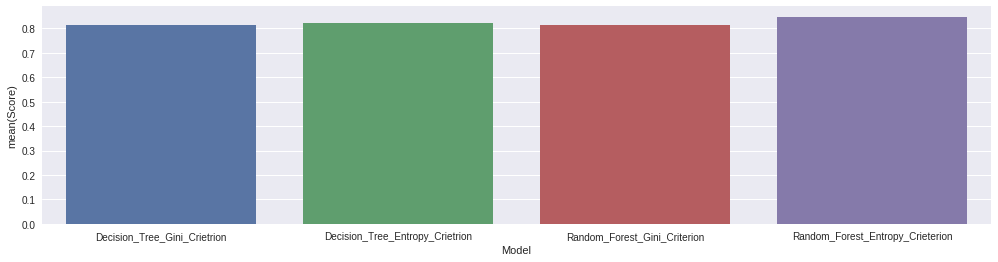

In [168]:
plt.figure(figsize=(17,4))
sns.barplot(x='Model',y='Score',data=compare)
plt.show()
sns.despine()

## Conclusion

We can see that entropy based criterion is better than gini based criterion as it has better score in both random forest and decision tree. The score entropy criterion model  for random forest is more than entropy criterion of decision tree.The score of gini criterion for both model is same .